In [307]:
%matplotlib notebook
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
plt.rcParams['figure.figsize'] = [8, 6]

In [308]:
folder = 'Data/DrivingCarNewYork'
frames = os.listdir(folder)

print("Frames count: ", len(frames))

Frames count:  149


In [309]:
frames.sort()
idx = frames.index('DrivingCarNewYork000.png')

In [310]:
obj_id = 1
if obj_id == 0:
    x1, y1 = 604, 342
    x2, y2 = 662, 357
elif obj_id == 1:
    x1, y1 = 339, 359
    x2, y2 = 410, 414
    
width = x2 - x1
height = y2 - y1

<IPython.core.display.Javascript object>


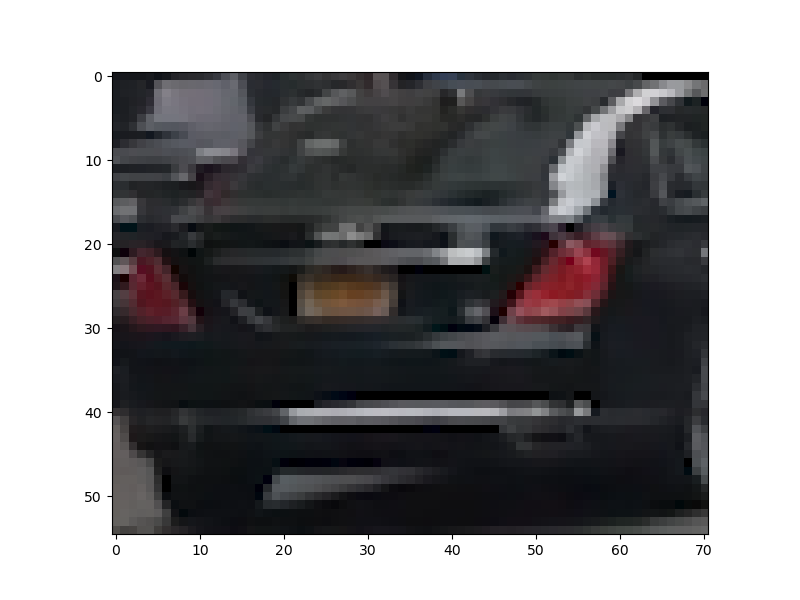

In [311]:
# Genrate tracking template
im = cv2.imread(os.path.join(folder, frames[idx]))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#tracking template
template = im[y1:y2, x1:x2]/255

plt.imshow(template)
   

In [312]:
imgs = []

# Set up tracker
tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'MOSSE', 'CSRT']
tracker_type = tracker_types[2]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy.TrackerBoosting_create()
if tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create() 
if tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create() 
if tracker_type == 'TLD':
    tracker = cv2.legacy.TrackerTLD_create() 
if tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy.TrackerMedianFlow_create() 
if tracker_type == 'MOSSE':
    tracker = cv2.legacy.TrackerMOSSE_create()
if tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT_create()
    
    
# Initialize tracker
bbox = (x1, y1, width, height)
ok = tracker.init(img, bbox)

imgs = []

# Tracking loop
for ii in range(idx, idx + 140):
    img = cv2.imread(os.path.join(folder, frames[ii]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        
    ok, bbox = tracker.update(img)
    print("Frame ", ii, " : ", ok, bbox)

            
    # Show the tracker working
    x1, y1 = int(bbox[0]), int(bbox[1])
    width, height = int(bbox[2]), int(bbox[3])
    imgs.append( cv2.rectangle(img, (x1, y1), (x1+width, y1+height), (0, 255, 0), 2) )
    #plt.imshow(img)
    #plt.show(), plt.draw()    
    #plt.waitforbuttonpress(0.1)
    #plt.clf()
    
print( len(imgs) )



Frame  0  :  True (339, 359, 71, 55)
Frame  1  :  True (340, 359, 71, 55)
Frame  2  :  True (343, 359, 71, 55)
Frame  3  :  True (344, 359, 71, 55)
Frame  4  :  True (346, 359, 71, 55)
Frame  5  :  True (347, 359, 71, 55)
Frame  6  :  True (348, 358, 71, 55)
Frame  7  :  True (353, 359, 71, 55)
Frame  8  :  True (354, 357, 71, 55)
Frame  9  :  True (355, 357, 71, 55)
Frame  10  :  True (355, 357, 71, 55)
Frame  11  :  True (356, 357, 71, 55)
Frame  12  :  True (358, 356, 71, 55)
Frame  13  :  True (360, 357, 71, 55)
Frame  14  :  True (362, 355, 71, 55)
Frame  15  :  True (362, 355, 71, 55)
Frame  16  :  True (364, 354, 71, 55)
Frame  17  :  True (365, 355, 71, 55)
Frame  18  :  True (365, 354, 71, 55)
Frame  19  :  True (367, 355, 71, 55)
Frame  20  :  True (368, 354, 71, 55)
Frame  21  :  True (370, 355, 71, 55)
Frame  22  :  True (371, 354, 71, 55)
Frame  23  :  True (372, 355, 71, 55)
Frame  24  :  True (374, 354, 71, 55)
Frame  25  :  True (376, 354, 71, 55)
Frame  26  :  True (37

<IPython.core.display.Javascript object>


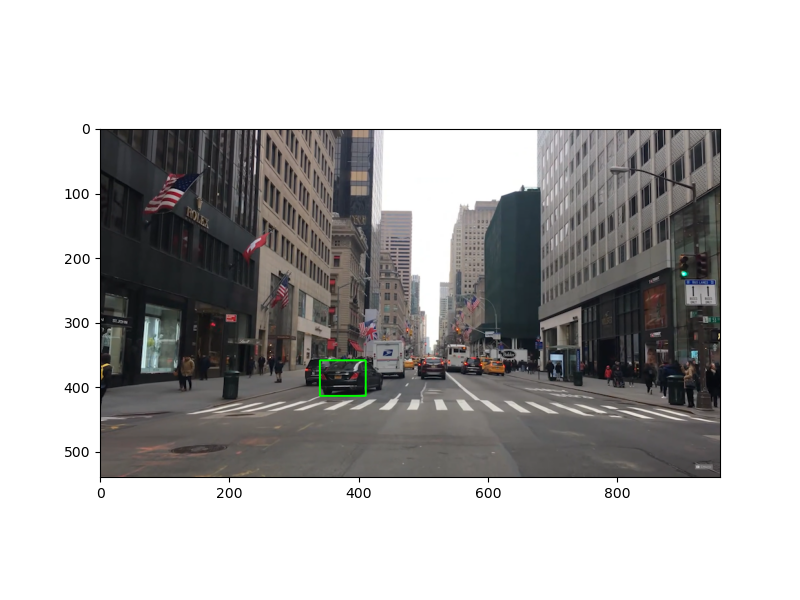

139


In [313]:
show = [] # for storing the generated images
fig = plt.figure()


for i in range(0, len(imgs) - 1):
    show.append( [plt.imshow(imgs[i], cmap='gray', animated=True)] )

print(len(show))
fps = 25
timelaps = 100/fps * len(show)

ani = animation.ArtistAnimation(fig, show, interval=1000/fps, blit=True, repeat_delay=timelaps)
#ani.save('movie.mp4')
plt.show()

<h2>Questions</h2>
<b>Do you see any differences? If so, what are they?</b><br>
<i>Yes. All trackers have rather different behaviour. The best performance we have if an object have linear movement without rotation. Some trackers loses object totally, other of them can stuck or switch on another object</i><br><br>
<b>Does one tracker perform better than the other? In what way?</b><br>
<i>All trackers have different speed and precision. And can be used for different cases.
As for me I figured out that 'KCF' can be useful in general case it has good presicion and medium speed. And 'BOOSTING' or 'MOSSE' if we need speed more than presicion. To figure out what trackers exactly fits real cases can help only practice and experience =) Also I've found a bunch of interesting articles on the internet about trackers comparation. It's very interesting :D</i>

<h2>Thanks for viewing!</h2> ❤️️